In [35]:
import datetime, pandas
import mplfinance as mpf
from alpaca_trade_api import Stream
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from dotenv import load_dotenv

In [36]:
import os
load_dotenv()

True

In [37]:
API_KEY = os.getenv("ALPACA_API")
SECERT_KEY = os.getenv("ALPACA_SECRET")

In [38]:
api = REST(key_id=API_KEY, secret_key=SECERT_KEY, base_url="https://paper-api.alpaca.markets")

In [39]:
from test_config import QQQ_SYMBOLS

SYMBOLS = QQQ_SYMBOLS

In [40]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)

# today = datetime.date(2022, 5, 9)
# yesterday = datetime.date(2022, 5, 6)

bars = api.get_bars(SYMBOLS, TimeFrame.Day, yesterday.isoformat(), today.isoformat()).df
bars

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-05-10 04:00:00+00:00,155.57,156.7400,152.9300,154.5100,114742115,981091,154.837162,AAPL
2022-05-11 04:00:00+00:00,153.45,155.4500,146.5100,146.7100,100622853,1015993,150.699047,AAPL
2022-05-10 04:00:00+00:00,122.95,123.4600,113.5300,116.1300,13588295,198407,116.643408,ABNB
2022-05-11 04:00:00+00:00,114.71,123.7700,112.3669,117.7500,11288982,146748,118.958167,ABNB
2022-05-10 04:00:00+00:00,385.72,400.8300,374.7800,393.0300,5297261,113424,389.609503,ADBE
...,...,...,...,...,...,...,...,...
2022-05-11 04:00:00+00:00,73.18,75.0900,73.0800,74.4200,2685649,45773,74.401637,XEL
2022-05-10 04:00:00+00:00,95.42,98.0700,87.3400,90.6800,6274670,103339,91.383791,ZM
2022-05-11 04:00:00+00:00,88.93,94.1600,86.7300,86.9225,3957961,62500,90.275738,ZM


In [41]:
bars['prev_close'] = bars['close'].shift(1)
bars

,open,high,low,close,volume,trade_count,vwap,symbol,prev_close
timestamp,,,,,,,,,
2022-05-10 04:00:00+00:00,155.57,156.7400,152.9300,154.5100,114742115,981091,154.837162,AAPL,NaN
2022-05-11 04:00:00+00:00,153.45,155.4500,146.5100,146.7100,100622853,1015993,150.699047,AAPL,154.5100
2022-05-10 04:00:00+00:00,122.95,123.4600,113.5300,116.1300,13588295,198407,116.643408,ABNB,146.7100
2022-05-11 04:00:00+00:00,114.71,123.7700,112.3669,117.7500,11288982,146748,118.958167,ABNB,116.1300
2022-05-10 04:00:00+00:00,385.72,400.8300,374.7800,393.0300,5297261,113424,389.609503,ADBE,117.7500
...,...,...,...,...,...,...,...,...,...
2022-05-11 04:00:00+00:00,73.18,75.0900,73.0800,74.4200,2685649,45773,74.401637,XEL,73.4900
2022-05-10 04:00:00+00:00,95.42,98.0700,87.3400,90.6800,6274670,103339,91.383791,ZM,74.4200
2022-05-11 04:00:00+00:00,88.93,94.1600,86.7300,86.9225,3957961,62500,90.275738,ZM,90.6800


In [42]:
filtered = bars[bars.index.strftime("%Y-%m-%d") == today.isoformat()].copy()
filtered

,open,high,low,close,volume,trade_count,vwap,symbol,prev_close
timestamp,,,,,,,,,
2022-05-11 04:00:00+00:00,153.45,155.4500,146.5100,146.7100,100622853,1015993,150.699047,AAPL,154.51
2022-05-11 04:00:00+00:00,114.71,123.7700,112.3669,117.7500,11288982,146748,118.958167,ABNB,116.13
2022-05-11 04:00:00+00:00,390.31,409.9899,379.5500,380.6300,2512795,68951,390.524789,ADBE,393.03
2022-05-11 04:00:00+00:00,153.43,157.3100,152.6059,153.3900,1963454,49193,155.160513,ADI,155.22
2022-05-11 04:00:00+00:00,210.64,214.0250,208.1700,208.5000,1114181,33791,211.001273,ADP,212.34
...,...,...,...,...,...,...,...,...,...
2022-05-11 04:00:00+00:00,43.51,44.2900,43.2150,43.4300,3850589,44858,43.664005,WBA,43.31
2022-05-11 04:00:00+00:00,179.62,186.8100,174.0700,174.3600,2059980,44409,179.501926,WDAY,183.67
2022-05-11 04:00:00+00:00,73.18,75.0900,73.0800,74.4200,2685649,45773,74.401637,XEL,73.49


In [43]:
filtered['percent'] = filtered['open'] /filtered['prev_close']
filtered

,open,high,low,close,volume,trade_count,vwap,symbol,prev_close,percent
timestamp,,,,,,,,,,
2022-05-11 04:00:00+00:00,153.45,155.4500,146.5100,146.7100,100622853,1015993,150.699047,AAPL,154.51,0.993140
2022-05-11 04:00:00+00:00,114.71,123.7700,112.3669,117.7500,11288982,146748,118.958167,ABNB,116.13,0.987772
2022-05-11 04:00:00+00:00,390.31,409.9899,379.5500,380.6300,2512795,68951,390.524789,ADBE,393.03,0.993079
2022-05-11 04:00:00+00:00,153.43,157.3100,152.6059,153.3900,1963454,49193,155.160513,ADI,155.22,0.988468
2022-05-11 04:00:00+00:00,210.64,214.0250,208.1700,208.5000,1114181,33791,211.001273,ADP,212.34,0.991994
...,...,...,...,...,...,...,...,...,...,...
2022-05-11 04:00:00+00:00,43.51,44.2900,43.2150,43.4300,3850589,44858,43.664005,WBA,43.31,1.004618
2022-05-11 04:00:00+00:00,179.62,186.8100,174.0700,174.3600,2059980,44409,179.501926,WDAY,183.67,0.977950
2022-05-11 04:00:00+00:00,73.18,75.0900,73.0800,74.4200,2685649,45773,74.401637,XEL,73.49,0.995782


In [44]:
gap_ups = filtered[filtered['percent'] > 1.02]
gap_ups

,open,high,low,close,volume,trade_count,vwap,symbol,prev_close,percent
timestamp,,,,,,,,,,
2022-05-11 04:00:00+00:00,114.60,126.2700,114.11,122.71,6119144,95203,123.031140,EA,111.60,1.026882
2022-05-11 04:00:00+00:00,36.53,38.0738,34.15,34.49,8892633,83629,36.174683,PDD,35.56,1.027278


In [45]:
gap_downs = filtered[filtered['percent'] < 0.98]
gap_downs

,open,high,low,close,volume,trade_count,vwap,symbol,prev_close,percent
timestamp,,,,,,,,,,
2022-05-11 04:00:00+00:00,61.84,62.80,61.4301,61.4800,8224996,76881,62.249673,AZN,63.64,0.971716
2022-05-11 04:00:00+00:00,96.26,104.74,94.1800,99.0400,5501717,80675,100.361500,DDOG,98.31,0.979148
2022-05-11 04:00:00+00:00,60.29,61.57,60.2900,60.8700,6236522,83621,60.962074,GILD,61.78,0.975882
2022-05-11 04:00:00+00:00,472.92,499.80,470.3500,471.6200,1535609,34443,483.946399,PANW,484.04,0.977027
2022-05-11 04:00:00+00:00,179.62,186.81,174.0700,174.3600,2059980,44409,179.501926,WDAY,183.67,0.977950
2022-05-11 04:00:00+00:00,144.99,150.31,137.8000,138.5811,2791094,52364,143.907525,ZS,150.29,0.964735


In [46]:
gap_down_symbols = gap_downs['symbol'].tolist()
gap_down_symbols

['AZN', 'DDOG', 'GILD', 'PANW', 'WDAY', 'ZS']

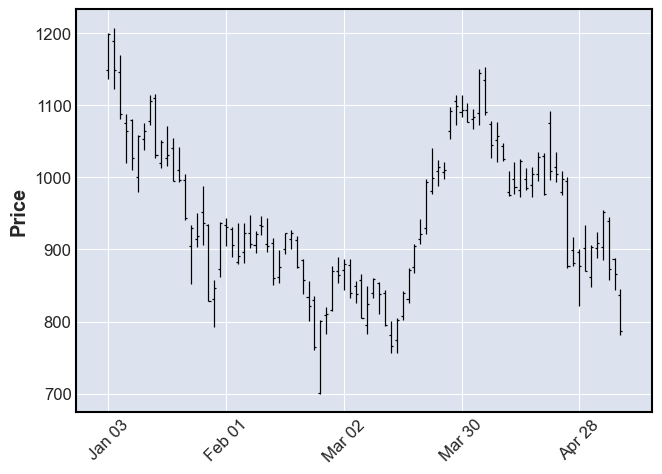

In [47]:
bars = api.get_bars("TSLA", TimeFrame.Day, '2022-01-01', '2022-05-09').df
mpf.plot(bars)

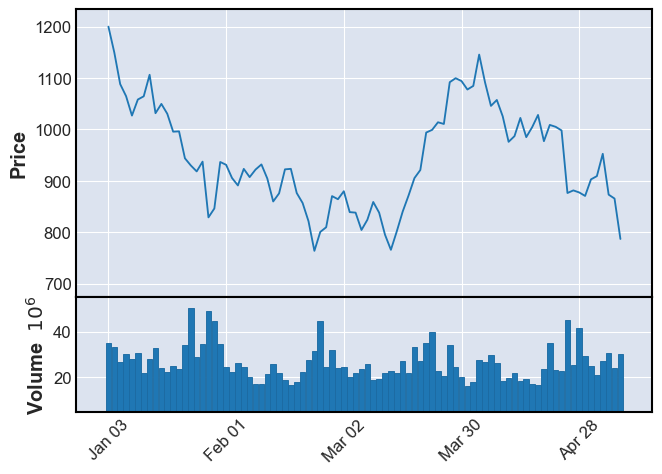

In [48]:
mpf.plot(bars, type='line', volume=True)